<br>
<br>

# ! If you don't have a gpu please run the code in Colab.

`We will work on CIFAR10 dataset. Where we have real world object, like truck,ship etc. There are basically 10 classes. `

<br>
<br>

In [1]:

import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt 


2024-09-07 00:28:30.687555: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-07 00:28:30.766606: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-07 00:28:31.364954: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-07 00:28:33.963058: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:

(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:

X_test.shape


(10000, 32, 32, 3)

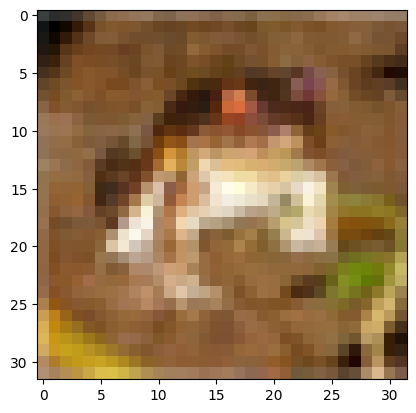

In [4]:
plt.imshow(X_train[0])

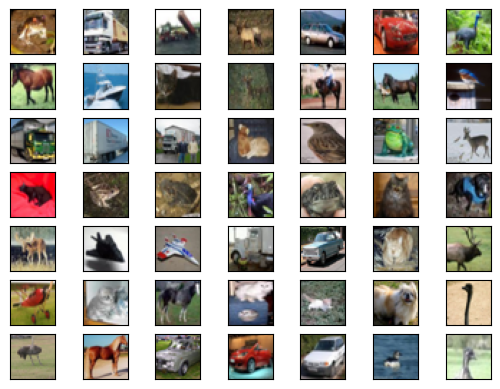

In [5]:

# show some of the images: 


for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])

    

<br>

! `Note: Exprementally: For GAN: `

- Activation Function: `Leaky_Relu` 
- "Here we'll use LeakyRelu as a layer."
- Loss Function: `Binary_CrossEntrophy`
- Optimizers : `Adam`

<br>

Process: 

- First we make descriminator function

<br>

<br>
<br>

---
---

<br>
<br>

# Recap CNN -> Learning: 

- `padding = "same" that means we apply padding. (the image size will be same after applying kernal operation)`

- `padding = "valid" that means we don't apply padding . `

- `In a Conv2D layer, learning occurs through the weights (filters/kernels) and biases that the layer adjusts during the training process.`

- `Each filter also has an associated bias term, which is a scalar value added to the result of the convolution operation.`

### Example Calculation for Parameters:
Let’s use the input layer of your Conv2D setup as an example:

- **Input Shape**: (32, 32, 3) — Image size is 32x32 with 3 channels (RGB image).
- **Filter Size**: (3, 3) — Each filter is a 3x3 matrix.
- **Number of Filters**: 64 — The Conv2D layer has 64 filters.

#### 1. `**Number of Weights (Kernel Parameters)**:`
For each filter, the number of weights is:

$\text{Kernel Width} \times \text{Kernel Height} \times \text{Input Channels}$ = 3 $\times$ 3 $\times$ 3 = 27 $\text{ weights per filter}$

Since you have 64 filters, the total number of weight parameters is:

27 $\times$ 64 = 1728 $\text{ weight parameters}$

#### 2. `**Number of Bias Terms**:`
Each of the 64 filters has a single bias term, so:

64 $\text{ bias parameters}$


#### 3. `**Total Parameters**:`
The total number of parameters in this Conv2D layer is the sum of weights and biases:

1728 $\text{ (weights)}$ + 64 $\text{ (biases)}$ = 1792 $\text{ total parameters}$


### Where Does Learning Happen in Conv2D:
- **Weights (filters)**: The model adjusts the values of the weights (the numbers inside the 3x3 kernels). These values start randomly, but through training, the model updates them to minimize the loss and extract better features from the images.
  
- **Biases**: Similarly, the bias terms are adjusted to fine-tune the output of each convolution operation.

### Summary:
In the Conv2D layer, learning happens by adjusting the **filters (weights)** and **bias terms** during training. These parameters are optimized through backpropagation and gradient descent, allowing the model to better detect patterns and features in the input data.

<br>
<br>

---
---

<br>
<br>


In [6]:

def define_descriminator(in_shape=(32,32,3)):
    model = tf.keras.Sequential()

    # input layer
    model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",input_shape=in_shape))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.02))

    # downsample (convert large image to small) we use strides
    model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding="same"))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.02))

    # downsample:
    model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding="same"))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.02))

    # downsample:
    model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=(2,2),padding="same"))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.02))

    # classifier:
    model.add(tf.keras.layers.Flatten())

    # dropOutlayer:
    model.add(tf.keras.layers.Dropout(0.4))

    # output layer:
    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

    # compile model 
    op = tf.keras.optimizers.Adam(learning_rate=0.002,beta_1=0.5)

    model.compile(loss="binary_crossentropy",optimizer=op,metrics=['accuracy'])
    
    return model


In [7]:


model = define_descriminator()
model.summary()


/home/yasin/allProgram/100DaysDL/code/venvML/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/yasin/allProgram/100DaysDL/code/venvML/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 522,497 (1.99 MB)

 Trainable params: 522,497 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

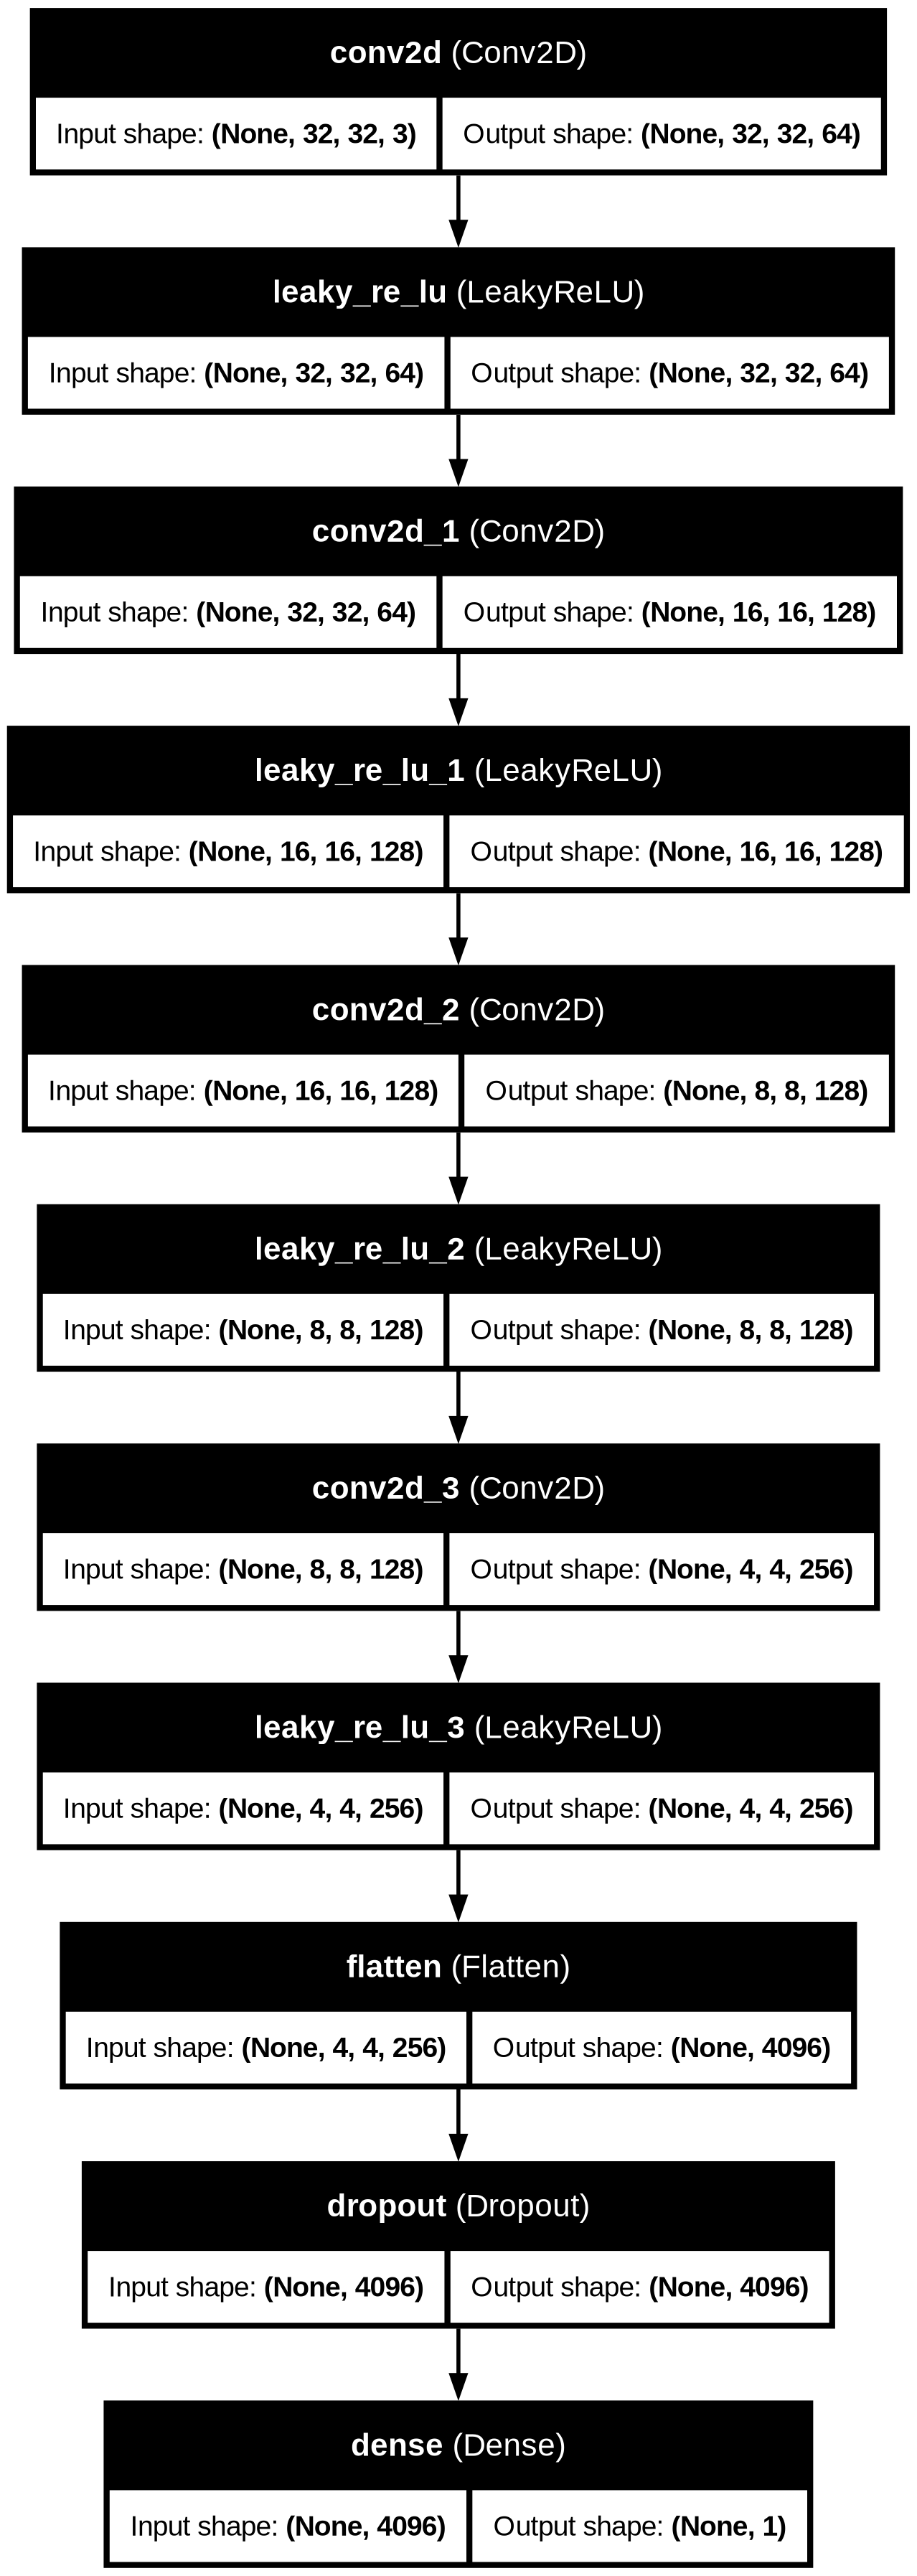

In [8]:


tf.keras.utils.plot_model(model=model,to_file="decrimenent_plot.png",show_shapes=True,show_layer_names=True)

